# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject as model
hsm = model.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [125]:
hsm.par.alpha = 0.4

In [126]:
dsol = hsm.solve_discrete()
print(f'LM: {dsol.LM} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')
print(f'LF: {dsol.LF} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')
print(f'HM: {dsol.HM} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')
print(f'HF: {dsol.HF} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')

LM: 2.0 for alpha and sigma: (0.4, 1)
LF: 6.5 for alpha and sigma: (0.4, 1)
HM: 6.0 for alpha and sigma: (0.4, 1)
HF: 3.0 for alpha and sigma: (0.4, 1)


In [145]:
alpha_vec = np.array([0.25, 0.5, 0.75])
sigma_vec = np.array([0.5, 1., 1.5])

Female_Male = []

for i in alpha_vec:
    for j in sigma_vec:
        hsm.par.alpha = i
        hsm.par.sigma = j

        Q1sol = hsm.solve_discrete()

        print(f'HF/HM: {Q1sol.HF/Q1sol.HM} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')

        Female_Male.append(Q1sol.HF/Q1sol.HM)

/Users/nina/Source/projects-2023-ctrl-alt-elite/inauguralproject/inauguralproject.py:60: RuntimeWarning: divide by zero encountered in reciprocal
  Q = C**par.omega*H**(1-par.omega)
/Users/nina/Source/projects-2023-ctrl-alt-elite/inauguralproject/inauguralproject.py:60: RuntimeWarning: invalid value encountered in reciprocal
  Q = C**par.omega*H**(1-par.omega)
/Users/nina/Source/projects-2023-ctrl-alt-elite/inauguralproject/inauguralproject.py:64: RuntimeWarning: invalid value encountered in reciprocal
  epsilon_ = 1+1/par.epsilon


HF/HM: 0.5 for alpha and sigma: (0.25, 0.5)
HF/HM: 0.2857142857142857 for alpha and sigma: (0.25, 1.0)
HF/HM: 0.125 for alpha and sigma: (0.25, 1.5)
HF/HM: 0.8888888888888888 for alpha and sigma: (0.5, 0.5)
HF/HM: 0.8 for alpha and sigma: (0.5, 1.0)
HF/HM: 0.8 for alpha and sigma: (0.5, 1.5)
HF/HM: 1.5714285714285714 for alpha and sigma: (0.75, 0.5)
HF/HM: 2.4 for alpha and sigma: (0.75, 1.0)
HF/HM: 4.333333333333333 for alpha and sigma: (0.75, 1.5)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


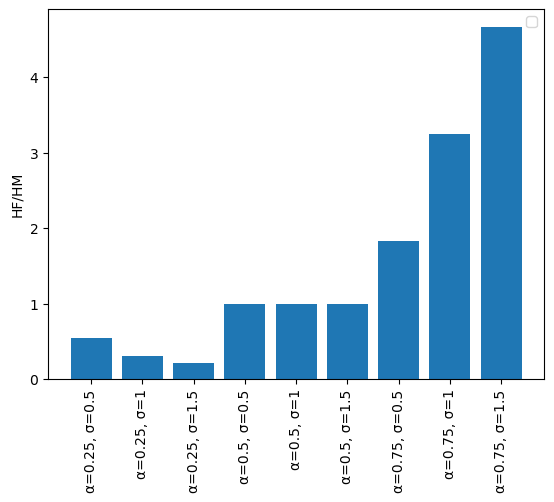

In [148]:

data = [['\u03B1=0.25, \u03C3=0.5', 0.5454545454545454], 
        ['\u03B1=0.25, \u03C3=1', 0.3076923076923077], 
        ['\u03B1=0.25, \u03C3=1.5', 0.21428571428571427], 
        ['\u03B1=0.5, \u03C3=0.5', 1], 
        ['\u03B1=0.5, \u03C3=1', 1],
        ['\u03B1=0.5, \u03C3=1.5', 1],
        ['\u03B1=0.75, \u03C3=0.5', 1.8333333333333333], 
        ['\u03B1=0.75, \u03C3=1', 3.25],
        ['\u03B1=0.75, \u03C3=1.5', 4.666666666666667]]


data = pd.DataFrame(data, columns = ['Object', 'Value']) 

ax = plt.subplot(111) #specify a subplot

bars = ax.bar(data['Object'], data['Value']) #Plot data on subplot axis
y_pos = range(len(bars))

plt.ylabel('HF/HM')
plt.xticks(rotation=90)

plt.legend()

plt.show()

# Question 2

Explain your code and procedure

In [139]:
wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

log_HF_HM = []

log_wF_wM = []

hsm.par.alpha = 0.5
hsm.par.sigma = 1

for i in wF_vec:
    hsm.par.wF = i
    
    #print(f'log wF/wM: {hsm.par.wF/hsm.par.wM} for wF: {hsm.par.wF}')

    Q2sol = hsm.solve_discrete()

    log_HF_HM.append(math.log(Q2sol.HF/Q2sol.HM))

    log_wF_wM.append(math.log(hsm.par.wF/hsm.par.wM))


print(log_HF_HM)
print(log_wF_wM)


/Users/nina/Source/projects-2023-ctrl-alt-elite/inauguralproject/inauguralproject.py:64: RuntimeWarning: invalid value encountered in reciprocal
  epsilon_ = 1+1/par.epsilon


[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


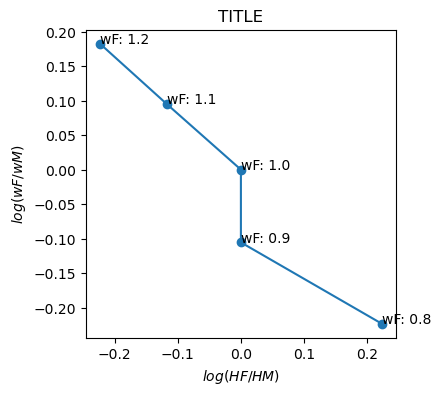

In [140]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(log_HF_HM,log_wF_wM)
ax.scatter(log_HF_HM,log_wF_wM)
ax.set_title('TITLE')
ax.set_xlabel('$log(HF/HM)$')
ax.set_ylabel('$log(wF/wM)$')


annotations=["wF: 0.8","wF: 0.9","wF: 1.0","wF: 1.1","wF: 1.2"]
for i, label in enumerate(annotations):
    plt.annotate(label, (log_HF_HM[i], log_wF_wM[i]))

# Question 3

Explain your code and procedure

We now assume that the choice set is continuous

In [25]:
# code
csol = hsm.solve_cont()

In [23]:
hsm.sol

namespace(LM_vec=array([0., 0., 0., 0., 0.]),
          HM_vec=array([0., 0., 0., 0., 0.]),
          LF_vec=array([0., 0., 0., 0., 0.]),
          HF_vec=array([0., 0., 0., 0., 0.]),
          beta0=nan,
          beta1=nan,
          LM=4.4550099123094915,
          HM=4.455009909157937,
          LF=4.455009912309491,
          HF=4.455009909157936)

ADD CONCISE CONLUSION.

# Question 4

In [ ]:
# code